# Importing libraries

In [1]:
import keras
from keras.datasets import mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import KFold
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

# Importing and Preprocessing
## First way:

In [2]:
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()

In [3]:
train_X = np.expand_dims(train_X, axis=3)
train_X = (train_X / 255) - 0.5
train_Y_one_hot = to_categorical(train_Y)


test_X = np.expand_dims(test_X, axis=3)
test_X = (test_X / 255) - 0.5
test_Y_one_hot = to_categorical(test_Y)

In [4]:
train_X.shape, test_X.shape, train_Y_one_hot.shape, test_Y_one_hot.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

## Second way:

In [5]:
def import_reshape_dataset():
    (train_X,train_Y), (test_X,test_Y) = mnist.load_data()
    
    #reshape and one-hot-encode the tarin data
    train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
    train_Y_one_hot = to_categorical(train_Y)

    #reshape and one-hot-encode the test data
    test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))
    test_Y_one_hot = to_categorical(test_Y)
    
    return train_X, train_Y_one_hot, test_X, test_Y_one_hot

In [6]:
def preprocess(train_data, test_data):
    # convert and normilize the train_data
    train_n = train_data.astype('float32')
    train_n = train_n / 255.0
    
    # convert and normilize the test_data
    test_n = test_data.astype('float32')
    test_n = test_n / 255.0

    return train_n, test_n

# Building the model

### We’ll use 3 types of layers for our CNN: Convolutional, Max Pooling, and Softmax.


In [7]:
def define_model(filter_num = 64, filter_size = 3, number_of_layer = 3, activation = 'relu', lr = 0.001):
    #define model
    model = Sequential()
    model.add(Conv2D(filter_num, (filter_size, filter_size), activation=activation, input_shape=(28, 28, 1), padding = 'same', strides = (1,1)))
    model.add(MaxPooling2D((2, 2)))
    for i in range(number_of_layer - 1):
        model.add(Conv2D(filter_num, (filter_size, filter_size), activation=activation))
        model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation=activation, kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(lr=lr, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
model = define_model()
history = []
history.append(model.fit(train_X, train_Y_one_hot,
          epochs=3,
          validation_data=(test_X, test_Y_one_hot)))

Epoch 1/3
1875/1875 [==============================] - 78s 41ms/step - loss: 0.3454 - accuracy: 0.8916 - val_loss: 0.0474 - val_accuracy: 0.9838
Epoch 2/3
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0464 - accuracy: 0.9860 - val_loss: 0.0503 - val_accuracy: 0.9839
Epoch 3/3
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0318 - val_accuracy: 0.9900


# evaluate model 

In [9]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)

print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0318 - accuracy: 0.9900
Test loss 0.03178424388170242
Test accuracy 0.9900000095367432


In [10]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[11])))

6


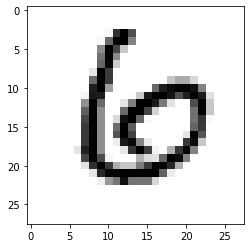

In [11]:
plt.imshow(test_X[11].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [12]:
# Predict on the first 5 test images.
predictions = model.predict(test_X[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_Y[:5]) 

[7 2 1 0 4]
[7 2 1 0 4]


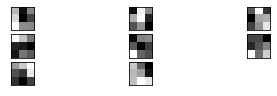

In [13]:
#getting weights and normalize
filters, _ = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

#plotting some first few filters
n_filters, ix = 8, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(1):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()

In [14]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    plt.show()

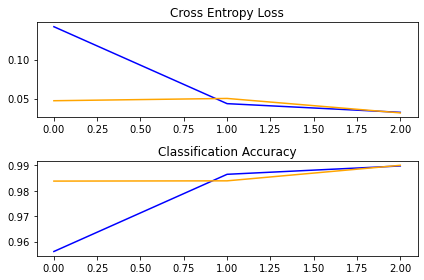

In [15]:
summarize_diagnostics(history)